# Homework2
### 20176005 Jegyeong Kim

##  
## Problem 1

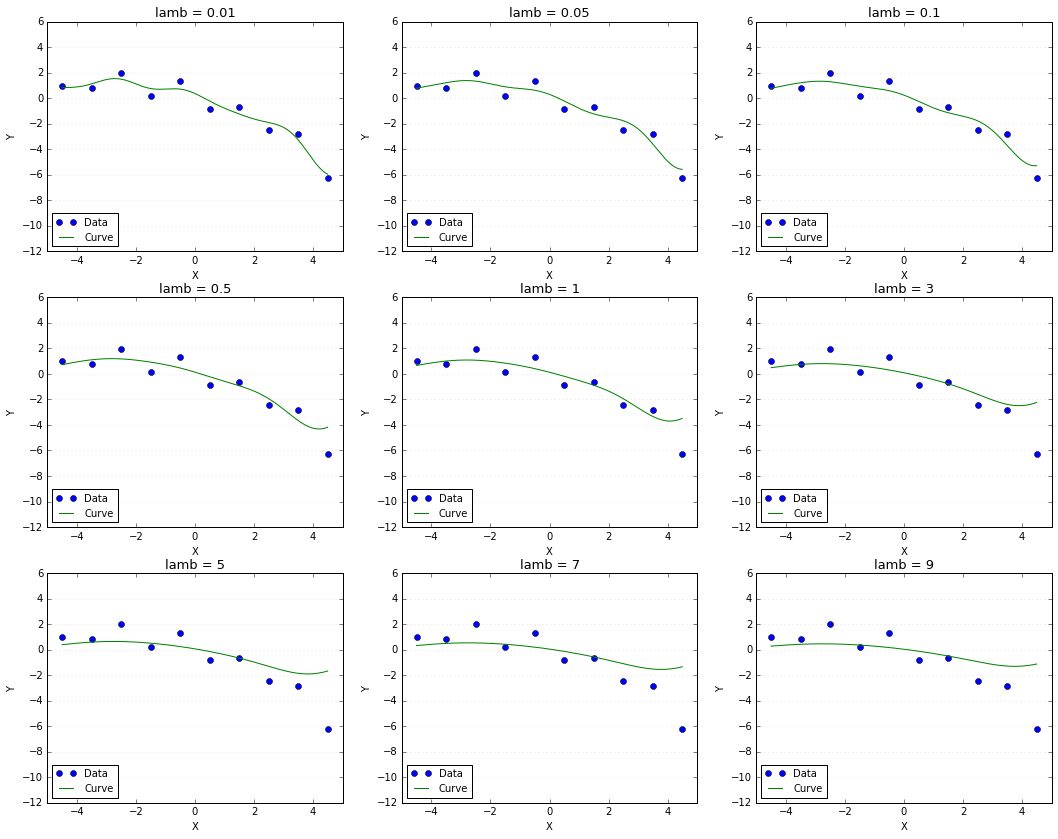

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

theta = cvx.Variable(d, 1)
lamb = [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 9]

plt.figure(figsize=(18, 14))

for i in range(len(lamb)):
    l=lamb[i]
    
    obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + l*cvx.sum_squares(theta))
    prob = cvx.Problem(obj).solve()

    yp = rbfbasis*theta.value

    plt.subplot(3, 3, i+1)
    plt.plot(x, y, 'o', label='Data')
    plt.plot(xp, yp, label='Curve')
    plt.xlabel('X', fontsize=10)
    plt.ylabel('Y', fontsize=10)
    plt.axis([-5, 5, -12, 6])
    plt.title('lamb = {}'.format(l), fontsize=13)
    plt.legend(fontsize=10, loc='lower left')
    plt.grid(alpha=0.2, axis='y')
plt.show()

I think a number between 0.05 and 0.5 is proper lamb value.

#  
## Problem 4
### Step 1. Load the data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from six.moves import cPickle
import numpy as np

data = cPickle.load(open('E:\\unist\\2\\Machine Learning\\data.pkl', 'rb'))
data0 = data['0']
data1 = data['1']

data0 = data0 > 125
data1 = data1 > 125

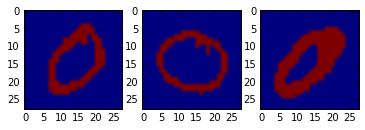

In [2]:
# how look like?
fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].imshow(data0[-i])
plt.show()

### Step 2. Extract features

In [15]:
def extract_feature(data):
    phi = []
    for img in data:
        phi.append([1, img[10:20, 10:20].mean(), img.mean()])
    return np.array(phi)

mat0 = extract_feature(data0)
mat1 = extract_feature(data1)
X = np.concatenate((mat0, mat1))

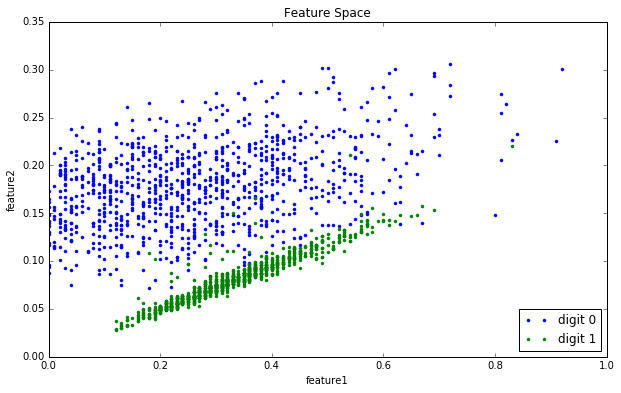

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(mat0[:,1], mat0[:,2], '.', label='digit 0')
plt.plot(mat1[:,1], mat1[:,2], '.', label='digit 1')
plt.legend(loc='lower right')
plt.title("Feature Space")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

#  
## Problem 5
### Step 1. Initialization

In [10]:
w = np.zeros([3, 1])
w = np.asmatrix(w)

### Step 2. Update w

In [11]:
#X = np.concatenate((mat0, mat1))
y = np.concatenate((-np.ones([mat0.shape[0], 1]), np.ones([mat1.shape[0], 1])))

X = np.asmatrix(X)
y = np.asmatrix(y)

In [12]:
wrong_pred = []
n_iter = 100
for k in range(n_iter):
    wp = 0
    for j in range(n_iter):
        i = np.random.randint(2000)
        yhat = np.sign(X[i,:]*w)
        if y[i] != yhat:
            w += y[i,0]*X[i,:].T
            wp += 1
    wrong_pred.append(wp)

### Step 3. Plot the result

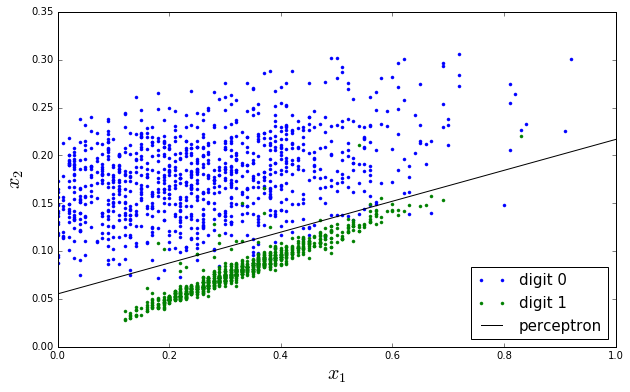

In [13]:
x1p = np.linspace(0,1,100).reshape(-1,1)
x2p = -(w[1,0]/w[2,0]*x1p) - w[0,0]/w[2,0]

plt.figure(figsize=(10, 6))
plt.plot(mat0[:,1], mat0[:,2], '.', label='digit 0')
plt.plot(mat1[:,1], mat1[:,2], '.', label='digit 1')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc='lower right', fontsize = 15)
plt.show()

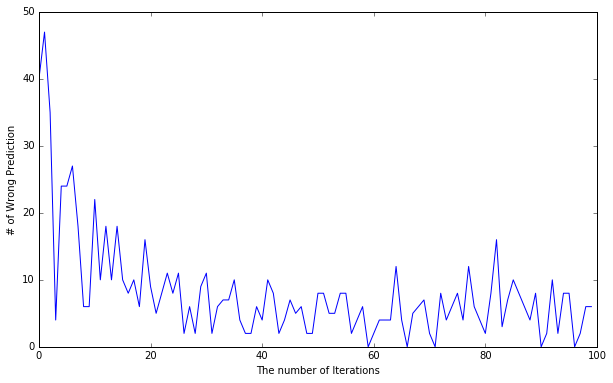

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(wrong_pred)
plt.xlabel('The number of Iterations')
plt.ylabel('# of Wrong Prediction')
plt.show()